In [209]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
words = open('makemore/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [45]:
# build vocab of chars and mappings to / from ints

chars = sorted(list(set(''.join(words)))) # all the characters from the dataset - basically the alphabet
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [210]:
def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one
  X, Y = [], []

  for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  
  return X, Y
    

In [211]:
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words=words[:n1])
Xdev, Ydev = build_dataset(words=words[n1:n2])
Xte, Yte = build_dataset(words=words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [131]:
# build dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [132]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [53]:
# build embedding 2-dimensional

C = torch.randn((27, 2))

In [59]:
C[5]

tensor([0.3038, 1.3735])

In [58]:
# same as indexing here, so discard approach
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.3038, 1.3735])

In [62]:
C[X].shape

torch.Size([32, 3, 2])

In [63]:
X[13, 2]

tensor(1)

In [65]:
C[X][13, 2]

tensor([ 0.6055, -0.7260])

In [66]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [67]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [68]:
# this does not work. we should rather take just the first three examples
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [73]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [75]:
torch.cat(torch.unbind(emb, 1), dim=1).shape # this creates new memory and is thus inefficient

torch.Size([32, 6])

In [76]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [77]:
a.shape

torch.Size([18])

In [79]:
a.view(3,3,2) # extremely efficient

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [80]:
a.storage()

/var/folders/44/54f79xn57xlflhm_qn4k7vq40000gn/T/ipykernel_71449/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [83]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [88]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # pay attention to broadcasting

h

tensor([[ 0.9955, -0.1397,  0.9754,  ...,  0.9804, -0.7717, -0.7715],
        [ 0.9985, -0.8567,  0.9205,  ..., -0.7482,  0.4663,  0.9601],
        [ 0.1247, -0.0918, -0.9179,  ...,  0.7437, -0.9996,  0.9906],
        ...,
        [ 0.9999, -0.9995,  0.9517,  ...,  0.9931,  0.9411, -0.7104],
        [ 0.9387, -0.0355,  0.9865,  ..., -0.9976, -0.9290, -0.9946],
        [ 1.0000, -0.9997,  0.4638,  ...,  0.9997, -0.9994,  0.6982]])

In [90]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2

In [91]:
logits.shape

torch.Size([32, 27])

In [97]:
counts = logits.exp() # fake counts
probs = counts / counts.sum(dim=1, keepdim=True)

In [99]:
probs.shape

torch.Size([32, 27])

In [100]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [102]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [108]:
# checks the assigned probabilities to the correct characters
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(20.8911)

In [276]:
# sum up and make it readable
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [277]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [278]:
for p in parameters:
  p.requires_grad = True

In [279]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [280]:
lri = []
lossi = []
stepi = []

In [281]:
for i in range(200000):
  # forward pass
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # probs = counts / counts.sum(dim=1, keepdim=True)
  # loss = -probs[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix]) # way more efficient to do it like this
  # print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
    
  loss.backward()
  
  # update
  # lr = lrs[i]
  # lr = 0.001 # start a lr decay once the loss is plateauing
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad
  
  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())
 

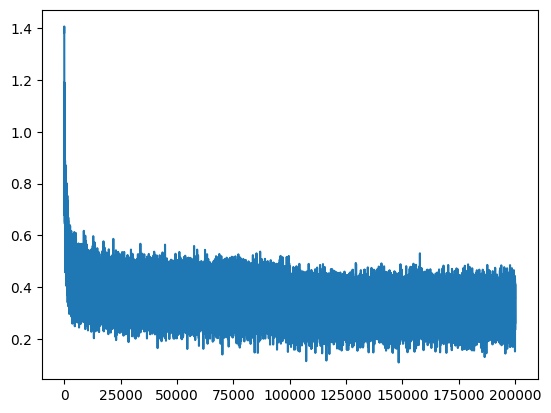

In [282]:
plt.plot(stepi, lossi)

In [283]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)

loss

tensor(2.1247, grad_fn=<NllLossBackward0>)

In [284]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)

loss

tensor(2.1659, grad_fn=<NllLossBackward0>)

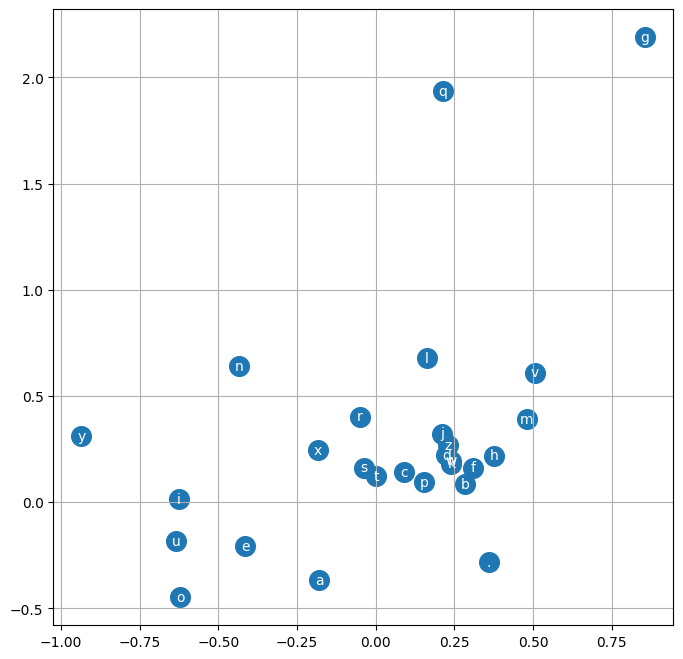

In [245]:
# visualize embeddings
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [129]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3347, 17.7906, 20.6013, 20.6118, 16.7355, 13.3347, 15.9986, 14.1725,
        15.9149, 18.3614, 15.9397, 20.9265, 13.3347, 17.1088, 17.1319, 20.0600,
        13.3347, 16.5889, 15.1016, 17.0579, 18.5863, 15.9671, 10.8740, 10.6872,
        15.5056, 13.3347, 16.1793, 16.9743, 12.7427, 16.2007, 19.0847, 16.0194],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [299]:
# sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])] # only dots
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))
  

carlah.
amorilvi.
kemleigentleenanden.
jazonte.
den.
art.
kaeli.
ner.
keah.
maiir.
kaleigh.
ham.
joce.
quintis.
lilea.
jadbi.
wanthoniearyxix.
kaeliighan.
edde.
iia.
